# 尤度について
(https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698)

## 正規分布図
平均10, 標準偏差3  
縦軸は確率密度 $f(x)$ となってる。

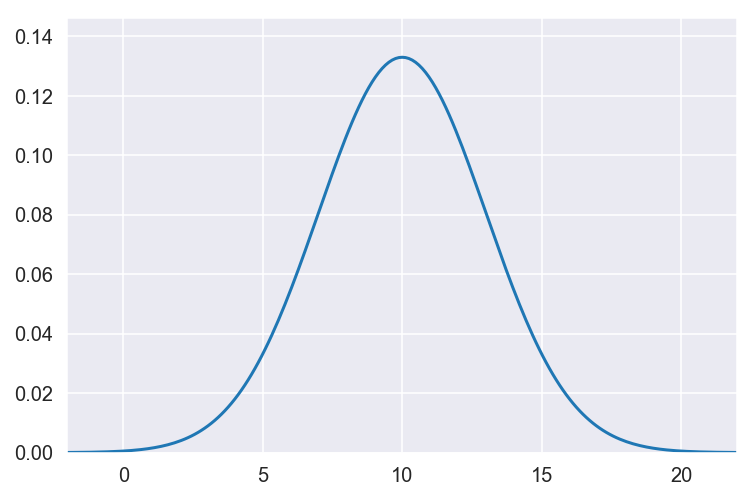

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.cm as cm
import numpy.random as rd

mean = 10
std = 3

min_x = mean - 4 * std
max_x = mean + 4 * std

x = np.linspace(min_x, max_x, 201)
y = (1 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-0.5 * (x - mean) ** 2 / std ** 2)

plt.figure()
plt.xlim(min_x, max_x)
plt.ylim(0, max(y) * 1.1)
plt.plot(x, y)
plt.show()

尤度関数の概念は、「サンプリングしてデータが観測された後、そのデータは元々どういうパラメータを持つ確率分布から生まれたものだったか？」という問いに答えるためのもの。  
尤度はベイズの定理を構成する1要素となっている。  
<br/>
ここで、標本が10個手に入り、$x = (x_1, x_2, ..., x_{10})$、それが正規分布に従うが、平均と標準偏差の2つのパラメータが不明であるとする。

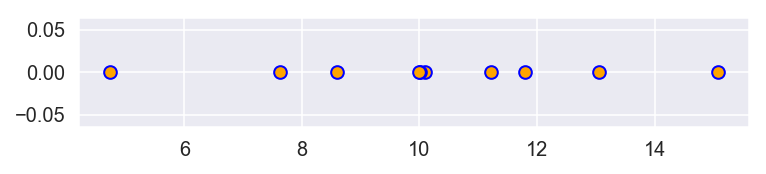

In [13]:
plt.figure(figsize=(6, 1))
rd.seed(7)
data = rd.normal(10, 3, 10,)
plt.scatter(data, np.zeros_like(data), c='orange', s=40,
            edgecolors='blue')
plt.show()